In [1]:
import tensorflow
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset= keras.datasets.fashion_mnist

In [3]:
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste)) =dataset.load_data()
imagens_treino

4422102/4422102 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

In [6]:
len(identificacoes_treino)

60000

In [7]:
len(identificacoes_teste)

10000

Text(0.5, 1.0, '9')

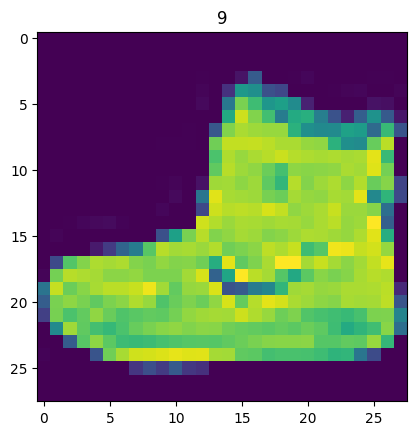

In [8]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

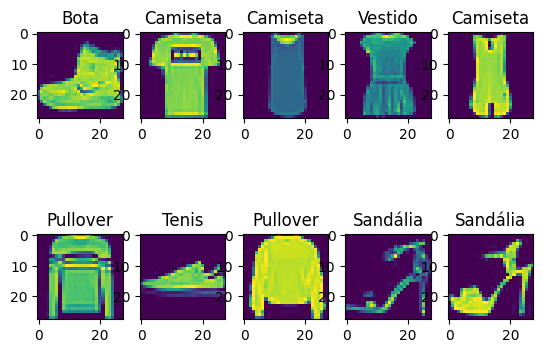

In [9]:
nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tenis','Bolsa','Bota']
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])


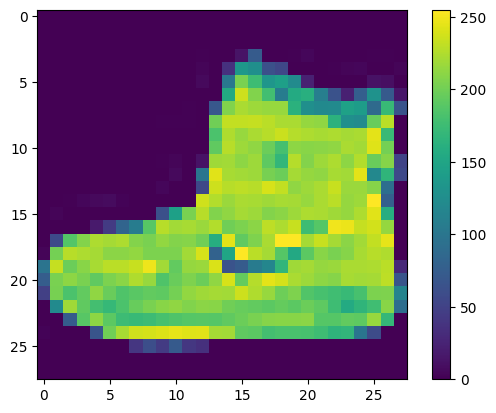

In [10]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [22]:
#transformação para as cores - normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [13]:
modelo.fit(imagens_treino,identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5058 - accuracy: 0.8201
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3857 - accuracy: 0.8601
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3560 - accuracy: 0.8684
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3339 - accuracy: 0.8768
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3178 - accuracy: 0.8816


In [14]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [15]:
print('resultado teste: ',np.argmax(testes[0]))
print('numero da imagem: ',identificacoes_teste[0])

resultado teste:  9
numero da imagem:  9


In [17]:
#Avaliação do modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste; ', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 2s 3ms/step - loss: 62.3383 - accuracy: 0.8441
Perda do teste;  62.33830642700195
Acurácia do teste 0.8440999984741211


In [18]:
historico = modelo.fit(imagens_treino,identificacoes_treino, epochs = 5,validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3014 - accuracy: 0.8898 - val_loss: 0.2928 - val_accuracy: 0.8907
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2924 - accuracy: 0.8899 - val_loss: 0.2984 - val_accuracy: 0.8893
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2837 - accuracy: 0.8935 - val_loss: 0.2891 - val_accuracy: 0.8925
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2734 - accuracy: 0.8972 - val_loss: 0.2813 - val_accuracy: 0.8957
Epoch 5/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2677 - accuracy: 0.8990 - val_loss: 0.2999 - val_accuracy: 0.8886


In [19]:
historico.history['val_accuracy']

[0.890749990940094,
 0.8893333077430725,
 0.8924999833106995,
 0.8956666588783264,
 0.8885833621025085]

In [20]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


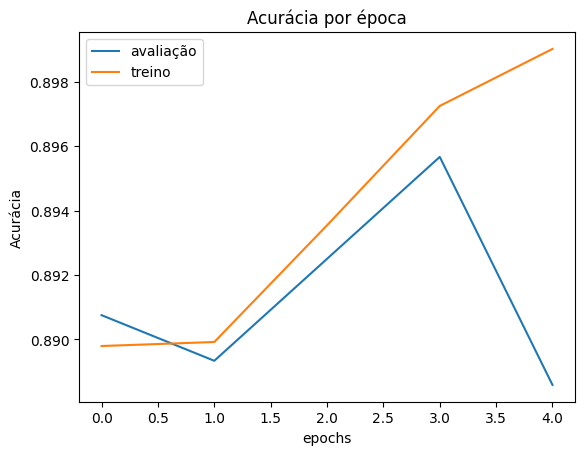

In [23]:
plt.plot(historico.history['val_accuracy'])
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('epochs')
plt.ylabel('Acurácia')
plt.legend(['avaliação','treino'])

In [26]:
testes_modelo_salvo = modelo_salvo.predict (imagens_teste)
print('resultado teste: ', np.argmax(imagens_teste[1]))
print('numero imagens de teste: ', identificacoes_teste[1])


testes_modelo_salvo = modelo_salvo.predict (imagens_teste)
print('resultado teste: ', np.argmax(testes_modelo_salvo[1]))
print('numero imagens de teste: ', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste:  41
numero imagens de teste:  2
313/313 [==============================] - 1s 2ms/step
resultado teste:  2
numero imagens de teste:  2
